Comparaison des différents kernels:


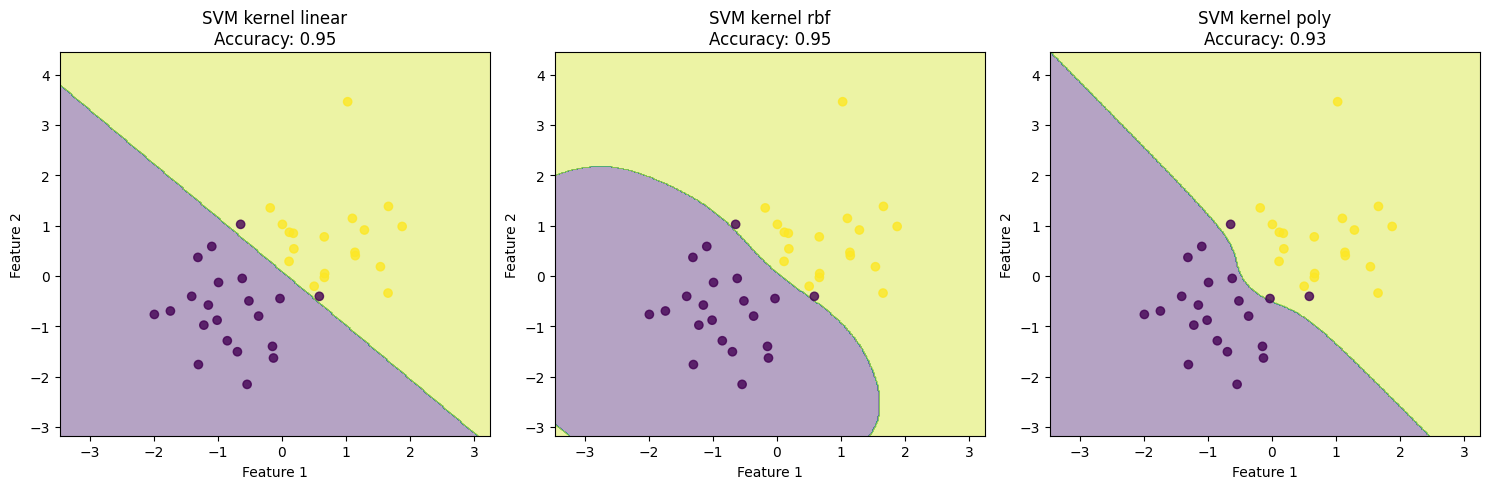


Optimisation des hyperparamètres:
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Meilleurs paramètres: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleure accuracy: 0.95

Rapport de classification:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       100
         1.0       0.98      0.93      0.95       100

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



In [2]:
import numpy as np
from sklearn.svm import SVC  # On utilise SVC au lieu de SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report  # Métriques de classification
import matplotlib.pyplot as plt

class SVMExample:
    def __init__(self):
        # Initialisation avec différents kernels pour classification
        self.models = {
            'linear': SVC(kernel='linear', random_state=42),
            'rbf': SVC(kernel='rbf', random_state=42),
            'poly': SVC(kernel='poly', degree=3, random_state=42)
        }
        self.scaler = StandardScaler()
        
    def generate_classification_data(self, n_samples=100):
        """Génère des données pour classification binaire"""
        np.random.seed(42)
        # Création de deux classes
        X1 = np.random.randn(n_samples, 2)
        y1 = np.zeros(n_samples)
        
        X2 = 2 + np.random.randn(n_samples, 2)
        y2 = np.ones(n_samples)
        
        X = np.vstack((X1, X2))
        y = np.hstack((y1, y2))
        
        return X, y
        
    def compare_kernels(self, X, y):
        """Compare différents kernels SVM"""
        # Normalisation des données
        X_scaled = self.scaler.fit_transform(X)
        
        # Division train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )
        
        plt.figure(figsize=(15, 5))
        
        for idx, (name, model) in enumerate(self.models.items()):
            # Entraînement
            model.fit(X_train, y_train)
            
            # Prédictions
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Création de la grille pour la visualisation
            x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
            y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                                np.arange(y_min, y_max, 0.02))
            
            # Visualisation
            plt.subplot(1, 3, idx + 1)
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            plt.contourf(xx, yy, Z, alpha=0.4)
            plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
            plt.title(f'SVM kernel {name}\nAccuracy: {accuracy:.2f}')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
        
        plt.tight_layout()
        
    def optimize_hyperparameters(self, X, y):
        """Optimisation des hyperparamètres avec GridSearchCV"""
        X_scaled = self.scaler.fit_transform(X)
        
        # Paramètres à tester pour la classification
        param_grid = {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto', 0.1, 1],
            'kernel': ['rbf', 'linear']
        }
        
        # GridSearch avec validation croisée
        grid_search = GridSearchCV(
            SVC(random_state=42),
            param_grid,
            cv=5,
            scoring='accuracy',
            verbose=1
        )
        
        grid_search.fit(X_scaled, y)
        
        print("\nMeilleurs paramètres:", grid_search.best_params_)
        print("Meilleure accuracy:", grid_search.best_score_)
        
        # Évaluation détaillée du meilleur modèle
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_scaled)
        print("\nRapport de classification:\n", classification_report(y, y_pred))
        
        return best_model

# Exemple d'utilisation
svm_example = SVMExample()
X, y = svm_example.generate_classification_data(n_samples=100)

print("Comparaison des différents kernels:")
svm_example.compare_kernels(X, y)
plt.show()

print("\nOptimisation des hyperparamètres:")
best_model = svm_example.optimize_hyperparameters(X, y)